In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
def detect_anomaly(l):
    l_diff = [l[i]-l[i-1] for i in range(1, len(l))]
    for i in range(1, len(l_diff)):
        if l_diff[i] > 5 * l_diff[i-1]:
            return False
    return True

In [45]:
anomalies = []
for history_file in os.listdir('./results'):
    if not history_file.endswith('.npz'):
        continue
    history = np.load('./results/{}'.format(history_file))
    if 'time' in history:
        time_history = history['time']
        if not detect_anomaly(time_history):
            anomalies.append(history_file)

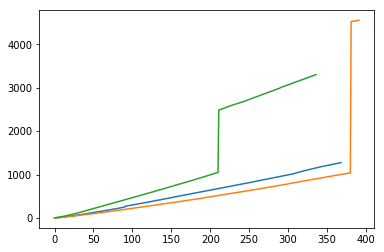

In [46]:
for history_file in anomalies:
    history = np.load('./results/{}'.format(history_file))
    plt.plot(history['time'])

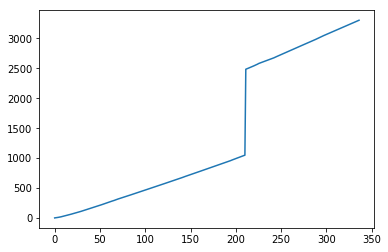